In [1]:
import sys; sys.path.insert(0, '..')
from decimal import Decimal
import decimal

from fimdp.consMDP import ConsMDP
from fimdp.explicit_energy import product

# Explicit representation of energy level in state-space

The goal of this notebook is to show the impact on state-space size if we encode the information about energy levels directly in the state-space. We first need a function, that does this encoding. 

Let's create a CMDP, we will use the following function for easier definitions of actions using uniform distributions.

In [2]:
def uniform(dests):
    """Create a uniform distribution for given destinations.
    
    dests: iterable of states
    """
    count = len(dests)
    mod = 100 % count
    decimal.getcontext().prec = 2
    prob = Decimal(1)/Decimal(count)
    dist = {i: prob for i in dests}
    last = dests[-1]
    dist[last] = dist[last] + Decimal("0.01")*mod
    return dist

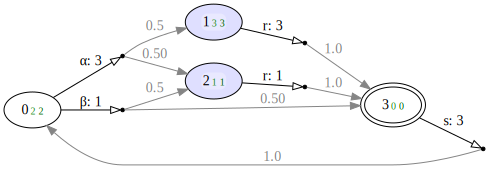

In [3]:
mdp = ConsMDP()
mdp.new_states(4)
mdp.set_reload(3)
mdp.add_action(0, uniform([1,2]), "α", 3)
mdp.add_action(0, uniform([2,3]), "β", 1)
mdp.add_action(1, uniform([3]), "r", 3)
mdp.add_action(2, uniform([3]), "r", 1)
mdp.add_action(3, uniform([0]), "s", 3)
mdp.get_Buchi([1,2], 5, True)
mdp

## Product of CMDP and energy counter

The state-space of the newly created MDP consists of tuples $(s, e)$, where $s$ is the state of the input CMDP and $e$ is the energy level. For a tuple-state $(s,e)$ and an action $a$ with consumption (in the input CMDP) $c$, all successors of the action $a$ in the new MDP are of the form $(s', e-c)$ for non-reload states and $(r,\mathsf{cap})$ for reload states.

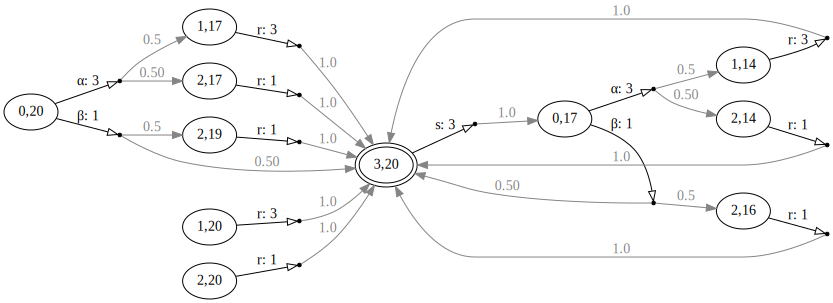

In [4]:
p, _ = product(mdp, 20)
p

## Comparison to our approach
We take the NYC case study and test the running time for MEC-decomposition (part of almost-sure Büchi algo), and compute Büchi using our approach for several capacities.

In [5]:
import ch_parser
import NYCtools
from mec_decomposition import get_MECs

m, T = ch_parser.parse('../examples/NYCstreetnetwork.json')

In [6]:
print(f"The consMDP has {m.num_states} states and {len(m.actions)} actions for arbitrary capacity.")

The consMDP has 7378 states and 8473 actions for arbitrary capacity.


In [7]:
def explicit_mecs(consMDP, cap):
    p, TT = product(consMDP, cap, T)
    %timeit mecs = get_MECs(p)
    mecs = get_MECs(p)
    print(f"The explicit MDP has {p.num_states} states and {len(p.actions)} actions for capacity {cap}.")
    print(f"There are {len(mecs)} MECs.")

In [8]:
explicit_mecs(m, 20)

961 ms ± 121 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The explicit MDP has 69881 states and 80414 actions for capacity 20.
There are 11 MECs.


In [9]:
explicit_mecs(m, 40)

6.24 s ± 202 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The explicit MDP has 187932 states and 216214 actions for capacity 40.
There are 18 MECs.


In [10]:
explicit_mecs(m, 60)

31.4 s ± 817 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The explicit MDP has 311301 states and 358066 actions for capacity 60.
There are 11 MECs.


In [11]:
explicit_mecs(m, 80)

2min 23s ± 5.59 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
The explicit MDP has 434885 states and 500162 actions for capacity 80.
There are 4 MECs.


In [12]:
%timeit m.get_Buchi(T, 20, recompute=True)

1.41 s ± 32.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit m.get_Buchi(T, 40, recompute=True)

3.17 s ± 50.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%timeit m.get_Buchi(T, 60, recompute=True)

2.84 s ± 46.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%timeit m.get_Buchi(T, 80, recompute=True)

1.61 s ± 24.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
